# Classification KNN algorithm

In [1]:
import pandas as pd
df=pd.read_csv("teleCust1000t.csv")
# df.columns
# df.dtypes
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [2]:
X=df[df.columns[:-1]]
# Y=df[df.columns[-1]].values
Y=df[["custcat"]].values
Y=Y.reshape(-1)#Changing 2D column to 1D
# Y=Y.reshape(-1,1)
X.dtypes
Y.ndim
# Y.value_counts()

1

In [3]:
# train_test_split of teleCust1000t data for knn classification
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#For predefined single value of k
# k=17 #0.355 accuracy score
k=4 #0.32 accuracy score
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
Yhat=neigh.predict(X_test)
Yhat[0:5]


array([3, 1, 3, 4, 4], dtype=int64)

In [5]:
# Checking accuracy of KNN algorithm
from sklearn.metrics import accuracy_score
print("Accuracy score of knn algorithm : ",accuracy_score(Y_test,Yhat))

Accuracy score of knn algorithm :  0.26


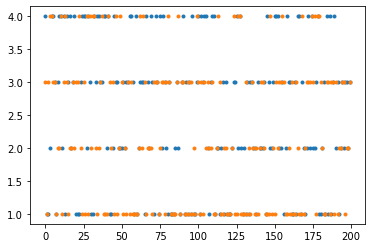

In [6]:
# Visualizing accuracy KNN algorithm
#Taking an idea from graph how the predictions are done
#Large blue dot is for Y_test, and small orange dot for Yhat predicted value
#If both dots completely overlapp, the the accuracy is near to 100%
import matplotlib.pyplot as plt
plt.plot(Y_test,'.',Yhat,'.')

### Choosing the best value of k for KNN algorithm

[0.275, 0.31, 0.275, 0.26, 0.3, 0.295, 0.35, 0.33, 0.32, 0.32, 0.345, 0.33, 0.32, 0.34, 0.355, 0.32, 0.335, 0.34, 0.355, 0.345, 0.325, 0.345, 0.345, 0.34, 0.335, 0.35, 0.345, 0.36, 0.35, 0.32, 0.325, 0.325, 0.325, 0.335, 0.355, 0.35, 0.335, 0.325, 0.375, 0.36, 0.36, 0.335, 0.335, 0.345, 0.375, 0.375, 0.37, 0.365, 0.36, 0.36, 0.37, 0.37, 0.375, 0.37, 0.38, 0.365, 0.375, 0.37, 0.37, 0.38, 0.365, 0.36, 0.38, 0.36, 0.36, 0.375, 0.375, 0.365, 0.365, 0.36, 0.37, 0.37, 0.375, 0.37, 0.37, 0.375, 0.39, 0.4, 0.38, 0.385, 0.375, 0.39, 0.375, 0.375, 0.38, 0.39, 0.385, 0.385, 0.375, 0.365, 0.37, 0.37, 0.37, 0.375, 0.385, 0.385, 0.385, 0.385, 0.375, 0.385]


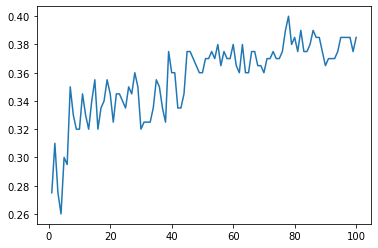

In [7]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
def knn_for_varius_values_of_k(ks):
    accuracy_result_of_varius_values_of_k=[]
    for i in range(1,ks+1):
        neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
        Yhat=neigh.predict(X_test)
        accuracy_score_for_k=accuracy_score(Y_test,Yhat)
        accuracy_result_of_varius_values_of_k.append(accuracy_score_for_k)
    return accuracy_result_of_varius_values_of_k

def visualize_accuracy_scores_of_various_values_of_k(ks,knn_accuracy_scores):
    plt.plot(range(1,ks+1),knn_accuracy_scores)
    
ks=100#Limit of last value of k
knn_accuracy_scores=[]
knn_accuracy_scores=knn_for_varius_values_of_k(ks)
print(knn_accuracy_scores)
visualize_accuracy_scores_of_various_values_of_k(ks,knn_accuracy_scores)


In [8]:
# print(index(max(knn_accuracy_scores)))
dir(list)
k=knn_accuracy_scores.index(max(knn_accuracy_scores))+1
print("Best value of k : ",k)
print("Best value of accuracy : ",max(knn_accuracy_scores),"  ",knn_accuracy_scores[k-1])#k=39, as result are 
#stored as k=1 on 0th index, so k=39 on 38th index



Best value of k :  78
Best value of accuracy :  0.4    0.4
